In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
data = '1.csv'
df = pd.read_csv(data)

df = df[(df.正負樣本 == 1) | (df.正負樣本 == -1)]

In [4]:
# 查看數據集的維度
df.shape

(376, 37)

In [5]:
# 讓我們預覽數據集
df.head()

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,ROE_2017,ROE_2018,ROE_2019,ROE_2020,ROE_2021,...,董監持股,現金殖利率,ROE_Test,EPS_Test,毛利率_Test,現金殖利率_Test,成交價_Test,董監持股_Test,符合數量,正負樣本
0,1101,台泥,11.00,3.69,26.64,6.88,12.94,12.54,13.10,9.54,...,8.38,6.95,1,1,1,1,1,0,5,1
1,1102,亞泥,9.81,4.05,24.67,4.65,9.77,13.54,11.07,10.01,...,27.37,7.10,0,1,1,1,1,1,5,1
5,1109,信大,14.89,2.40,30.69,10.82,17.31,17.87,15.95,12.51,...,36.22,6.58,1,1,1,1,1,1,6,1
7,1203,味王,12.00,1.86,32.54,13.71,12.26,11.86,11.08,11.10,...,28.84,3.55,1,1,1,0,1,1,5,1
9,1213,大飲,-9.02,-0.89,4.96,0.29,-13.76,-7.37,-4.96,-19.31,...,12.91,0.00,0,0,0,0,1,1,2,-1


In [6]:
# 查看數據集摘要
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 937
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   代碼          376 non-null    int64  
 1   股票          376 non-null    object 
 2   ROE_5Y      376 non-null    float64
 3   EPS_5Y      376 non-null    float64
 4   毛利率_5Y      376 non-null    float64
 5   ROE_2017    376 non-null    float64
 6   ROE_2018    376 non-null    float64
 7   ROE_2019    376 non-null    float64
 8   ROE_2020    376 non-null    float64
 9   ROE_2021    376 non-null    float64
 10  毛利率_2017    376 non-null    float64
 11  毛利率_2018    376 non-null    float64
 12  毛利率_2019    376 non-null    float64
 13  毛利率_2020    376 non-null    float64
 14  毛利率_2021    376 non-null    float64
 15  負債比_2017    376 non-null    float64
 16  負債比_2018    376 non-null    float64
 17  負債比_2019    376 non-null    float64
 18  負債比_2020    376 non-null    float64
 19  負債比_2021    376 non-null    f

In [7]:
col_names = ['ROE_5Y','EPS_5Y','毛利率_5Y','ROE_2017','ROE_2018','ROE_2019','ROE_2020','ROE_2021','毛利率_2017','毛利率_2018','毛利率_2019','毛利率_2020','毛利率_2021','負債比_2017','負債比_2018','負債比_2019','負債比_2020','負債比_2021','稅後淨利率_2017','稅後淨利率_2018','稅後淨利率_2019','稅後淨利率_2020','稅後淨利率_2021','現金股利','成交價','董監持股','現金殖利率','正負樣本']

for col in col_names:
    
    print(df[col].value_counts())

 0.00     4
 14.37    3
 11.00    2
-0.69     2
 24.11    2
         ..
-32.98    1
 16.45    1
-31.59    1
-20.04    1
-6.44     1
Name: ROE_5Y, Length: 351, dtype: int64
-0.28    4
 2.62    3
 3.10    3
 3.61    3
 3.78    3
        ..
-5.66    1
-0.92    1
 3.52    1
 2.84    1
 7.47    1
Name: EPS_5Y, Length: 305, dtype: int64
 0.00      13
 22.37      2
 13.57      2
 19.01      2
 11.54      2
           ..
-316.78     1
 49.83      1
 21.35      1
 37.65      1
 0.55       1
Name: 毛利率_5Y, Length: 347, dtype: int64
 0.00     4
 12.93    2
 7.22     2
-12.00    2
 1.21     2
         ..
 13.48    1
-2.36     1
-23.27    1
-11.52    1
-4.27     1
Name: ROE_2017, Length: 355, dtype: int64
 7.24     3
 14.62    2
 9.42     2
 10.58    2
 11.50    2
         ..
-13.29    1
-4.08     1
-10.86    1
 15.11    1
-14.65    1
Name: ROE_2018, Length: 362, dtype: int64
 10.95    2
 10.09    2
 11.44    2
 14.90    2
 9.09     2
         ..
-46.55    1
-35.94    1
 16.27    1
 15.73    1
 0.60

In [9]:
df['正負樣本'].value_counts()

 1    207
-1    169
Name: 正負樣本, dtype: int64

In [10]:
df.isnull().sum()

代碼            0
股票            0
ROE_5Y        0
EPS_5Y        0
毛利率_5Y        0
ROE_2017      0
ROE_2018      0
ROE_2019      0
ROE_2020      0
ROE_2021      0
毛利率_2017      0
毛利率_2018      0
毛利率_2019      0
毛利率_2020      0
毛利率_2021      0
負債比_2017      0
負債比_2018      0
負債比_2019      0
負債比_2020      0
負債比_2021      0
稅後淨利率_2017    0
稅後淨利率_2018    0
稅後淨利率_2019    0
稅後淨利率_2020    0
稅後淨利率_2021    0
現金股利          0
成交價           0
董監持股          0
現金殖利率         0
ROE_Test      0
EPS_Test      0
毛利率_Test      0
現金殖利率_Test    0
成交價_Test      0
董監持股_Test     0
符合數量          0
正負樣本          0
dtype: int64

In [12]:
X = df.drop(['代碼', '股票', 'ROE_Test', 'EPS_Test', '毛利率_Test', '現金殖利率_Test', '成交價_Test', '董監持股_Test','符合數量','正負樣本'], axis=1)

y = df['正負樣本']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
X_train.shape, X_test.shape

((251, 27), (125, 27))

In [15]:
X_train.dtypes

ROE_5Y        float64
EPS_5Y        float64
毛利率_5Y        float64
ROE_2017      float64
ROE_2018      float64
ROE_2019      float64
ROE_2020      float64
ROE_2021      float64
毛利率_2017      float64
毛利率_2018      float64
毛利率_2019      float64
毛利率_2020      float64
毛利率_2021      float64
負債比_2017      float64
負債比_2018      float64
負債比_2019      float64
負債比_2020      float64
負債比_2021      float64
稅後淨利率_2017    float64
稅後淨利率_2018    float64
稅後淨利率_2019    float64
稅後淨利率_2020    float64
稅後淨利率_2021    float64
現金股利          float64
成交價           float64
董監持股          float64
現金殖利率         float64
dtype: object

In [16]:
X_train.head()

,ROE_5Y,EPS_5Y,毛利率_5Y,ROE_2017,ROE_2018,ROE_2019,ROE_2020,ROE_2021,毛利率_2017,毛利率_2018,...,負債比_2021,稅後淨利率_2017,稅後淨利率_2018,稅後淨利率_2019,稅後淨利率_2020,稅後淨利率_2021,現金股利,成交價,董監持股,現金殖利率
331,15.79,3.24,37.65,15.34,16.47,15.73,13.95,17.48,37.73,36.88,...,39.81,15.76,17.75,18.28,17.96,21.92,2.61,38.70,22.71,6.74
444,-26.89,-2.66,17.77,-25.49,-46.23,-28.89,-26.12,-7.74,17.44,29.50,...,67.44,-31.62,-64.91,-24.54,-25.12,-22.04,0.04,16.60,13.76,0.24
84,-3.22,-0.26,16.04,4.43,3.14,-5.44,-21.67,3.42,19.62,17.97,...,53.33,2.43,1.67,-3.07,-12.76,1.82,0.38,7.86,0.00,4.83
94,-1.86,-0.33,12.80,1.21,1.67,2.10,-10.01,-4.27,12.57,12.82,...,41.42,0.59,0.78,1.05,-5.95,-2.34,0.36,19.25,21.29,1.87
703,4.51,1.22,10.41,8.35,15.37,17.29,-44.29,25.84,11.14,12.83,...,73.77,1.62,2.69,2.93,-7.56,3.90,0.85,30.80,1.46,2.76


In [17]:
import category_encoders as ce

In [19]:
encoder = ce.OrdinalEncoder(cols=['ROE_5Y','EPS_5Y','毛利率_5Y','ROE_2017','ROE_2018','ROE_2019','ROE_2020','ROE_2021','毛利率_2017','毛利率_2018','毛利率_2019','毛利率_2020','毛利率_2021','負債比_2017','負債比_2018','負債比_2019','負債比_2020','負債比_2021','稅後淨利率_2017','稅後淨利率_2018','稅後淨利率_2019','稅後淨利率_2020','稅後淨利率_2021','現金股利','成交價','董監持股','現金殖利率'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [20]:
X_train.head()

,ROE_5Y,EPS_5Y,毛利率_5Y,ROE_2017,ROE_2018,ROE_2019,ROE_2020,ROE_2021,毛利率_2017,毛利率_2018,...,負債比_2021,稅後淨利率_2017,稅後淨利率_2018,稅後淨利率_2019,稅後淨利率_2020,稅後淨利率_2021,現金股利,成交價,董監持股,現金殖利率
331,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
444,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
84,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
94,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
703,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [21]:
X_test.head()

,ROE_5Y,EPS_5Y,毛利率_5Y,ROE_2017,ROE_2018,ROE_2019,ROE_2020,ROE_2021,毛利率_2017,毛利率_2018,...,負債比_2021,稅後淨利率_2017,稅後淨利率_2018,稅後淨利率_2019,稅後淨利率_2020,稅後淨利率_2021,現金股利,成交價,董監持股,現金殖利率
745,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,210.0,95.0,-1.0,-1.0,-1.0
880,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
675,-1.0,76.0,104.0,-1.0,-1.0,-1.0,147.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,200.0,-1.0,14.0,130.0,-1.0,-1.0
412,-1.0,194.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
385,-1.0,-1.0,-1.0,-1.0,-1.0,120.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,81.0,-1.0,-1.0


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
y_pred_gini = clf_gini.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.4480


In [26]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([-1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1,  1,  1,  1, -1

In [27]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7410


In [28]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7410
Test set score: 0.4480


[Text(0.5, 0.875, 'X[23] <= 19.5\ngini = 0.497\nsamples = 251\nvalue = [116, 135]'),
 Text(0.25, 0.625, 'X[1] <= 16.5\ngini = 0.338\nsamples = 51\nvalue = [40, 11]'),
 Text(0.125, 0.375, 'X[0] <= 7.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.0625, 0.125, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.1875, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.375, 0.375, 'X[26] <= 125.5\ngini = 0.056\nsamples = 35\nvalue = [34, 1]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.4375, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.75, 0.625, 'X[25] <= 10.0\ngini = 0.471\nsamples = 200\nvalue = [76, 124]'),
 Text(0.625, 0.375, 'X[1] <= 81.5\ngini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.5625, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.875, 0.375, 'X[2] <= 18.5\ngini = 0.449\nsamples = 185\nvalue = [63, 122]'),
 Text(0.8125, 0

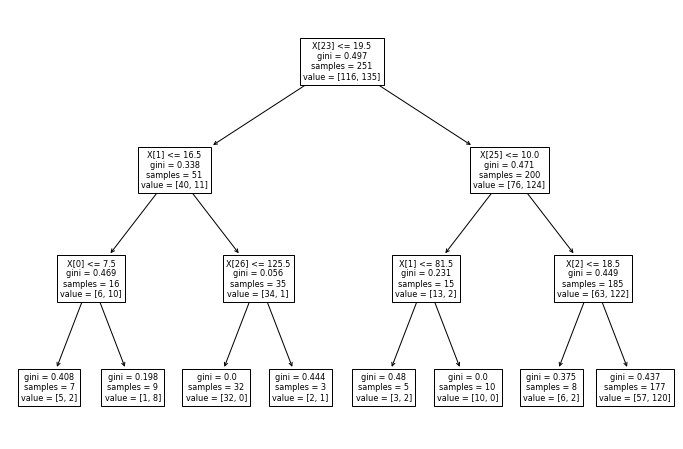

In [29]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 